<a href="https://colab.research.google.com/github/obinna-nweke/game-of-thrones-analysis/blob/main/Comparative%20Analysis%20of%20AirBnB%20listings%20in%20Chicago%20and%20NY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install contextily
!pip install mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 57.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns

In [4]:
gdf = gpd.read_file('Data/Chi neighbourhoods.geojson')
gdf.head(1)

,neighbourhood,neighbourhood_group,geometry
0,Lincoln Square,None,"MULTIPOLYGON (((-87.67440 41.97610, -87.67440 ..."


In [8]:
ny_gdf = gpd.read_file('Data/NY neighbourhoods.geojson')
ny_gdf.head(1)

,neighbourhood,neighbourhood_group,geometry
0,Bayswater,Queens,"MULTIPOLYGON (((-73.76671 40.61491, -73.76825 ..."


We have 77 observations in the Chicago Data and 233 observations in the New York Data.

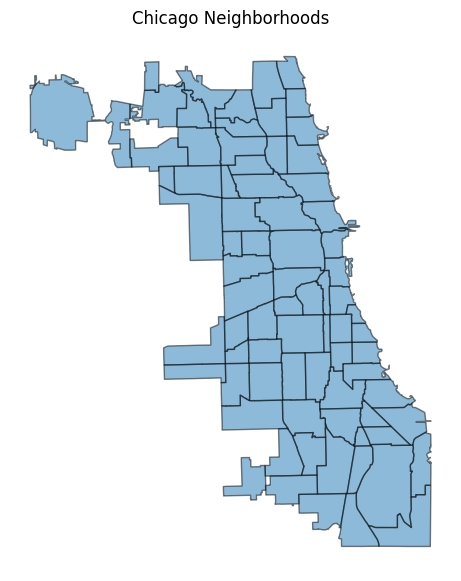

In [5]:
gdf.plot(figsize=(7,7),alpha=0.5, edgecolor='k')
plt.title("Chicago Neighborhoods");
plt.axis("off");

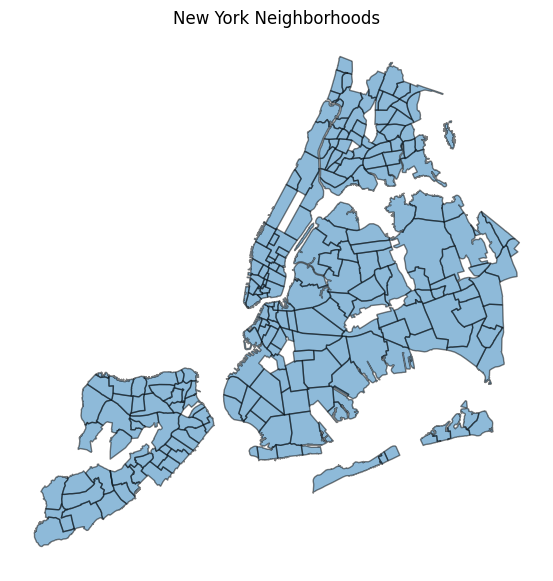

In [10]:
ny_gdf.plot(figsize=(7,7),alpha=0.5, edgecolor='k')
plt.title("New York Neighborhoods");
plt.axis("off");

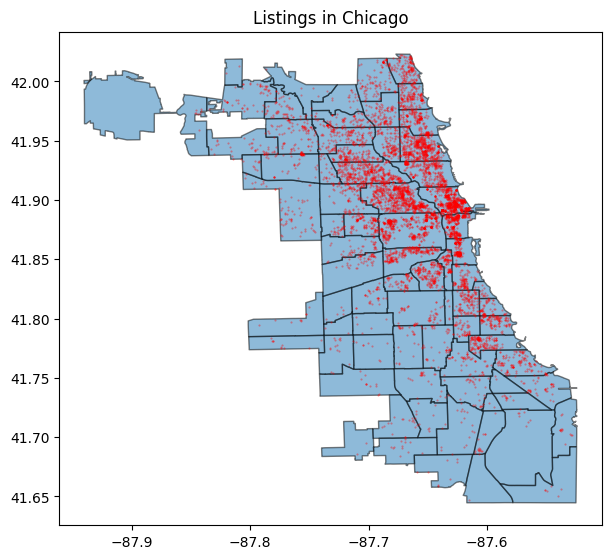

In [11]:
chi_data = pd.read_csv('Data/Chicago listings.csv')
chi_geo = gpd.GeoDataFrame(chi_data, geometry=gpd.points_from_xy(chi_data.longitude, chi_data.latitude))
ax1 = gdf.plot(figsize=(7,7), edgecolor='k', alpha=0.5)
chi_geo.plot(ax=ax1, color = 'r', marker='.', markersize = 1, alpha=0.4)
plt.title("Listings in Chicago");
plt.show()

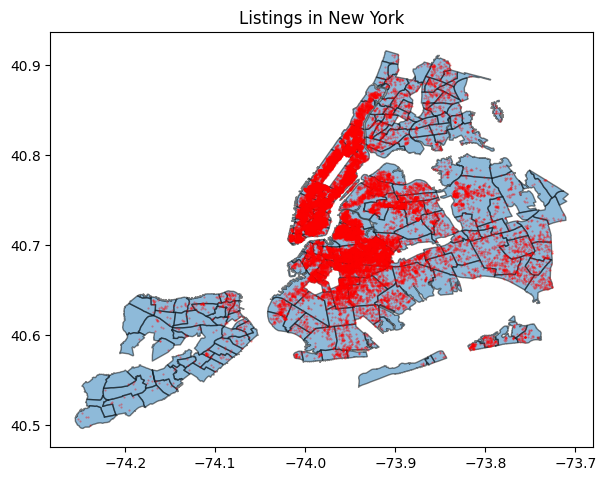

In [12]:
ny_data = pd.read_csv('Data/NY listings.csv')
ny_geo = gpd.GeoDataFrame(ny_data, geometry=gpd.points_from_xy(ny_data.longitude, ny_data.latitude))
ax1 = ny_gdf.plot(figsize=(7,7), edgecolor='k', alpha=0.5)
ny_geo.plot(ax=ax1, color = 'r', marker='.', markersize = 1, alpha=0.4)
plt.title("Listings in New York");
plt.show()

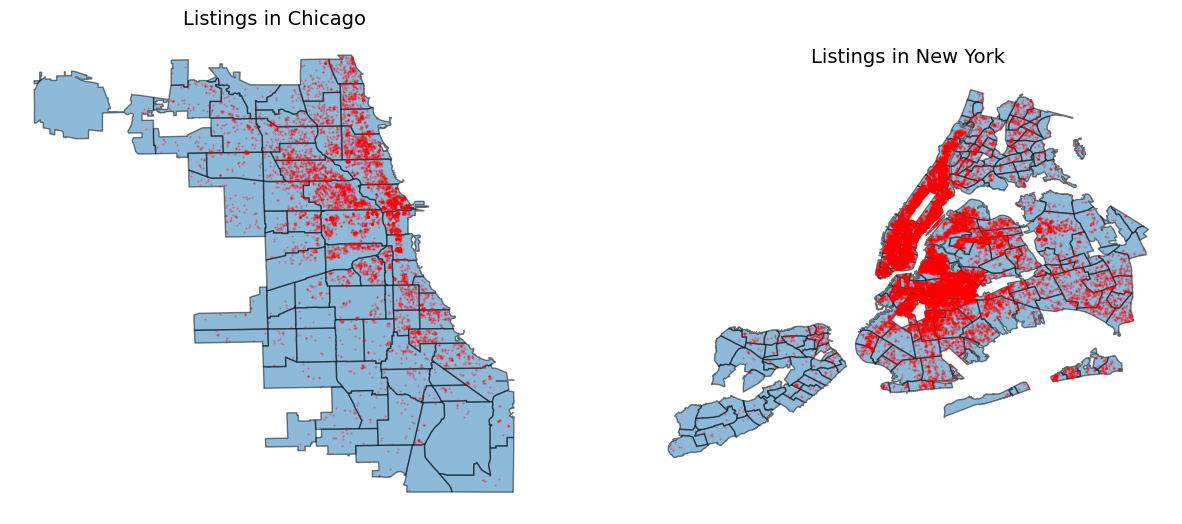

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot Chicago listings
chi_base = gdf.plot(ax=ax1, edgecolor='k', alpha=0.5); chi_geo.plot(ax=chi_base, color='r', marker='.', markersize=1, alpha=0.4)
ax1.set_title("Listings in Chicago", fontsize=14); ax1.set_axis_off()

# Plot New York listings
ny_base = ny_gdf.plot(ax=ax2, edgecolor='k', alpha=0.5); ny_geo.plot(ax=ny_base, color='r', marker='.', markersize=1, alpha=0.4)
ax2.set_title("Listings in New York", fontsize=14); ax2.set_axis_off()
# plt.tight_layout()

In [13]:
gdf['AREA'] = gdf['geometry'].to_crs(epsg=3395).area
gdf.head(1)

,neighbourhood,neighbourhood_group,geometry,AREA
0,Lincoln Square,None,"MULTIPOLYGON (((-87.67440 41.97610, -87.67440 ...",1.195750e+07


In [14]:
ny_gdf['AREA'] = ny_gdf['geometry'].to_crs(epsg=3395).area
ny_gdf.head(1)

,neighbourhood,neighbourhood_group,geometry,AREA
0,Bayswater,Queens,"MULTIPOLYGON (((-73.76671 40.61491, -73.76825 ...",407381.775319


Data on the size of each neighborhood group is available for New York but is unavailable for Chicago..


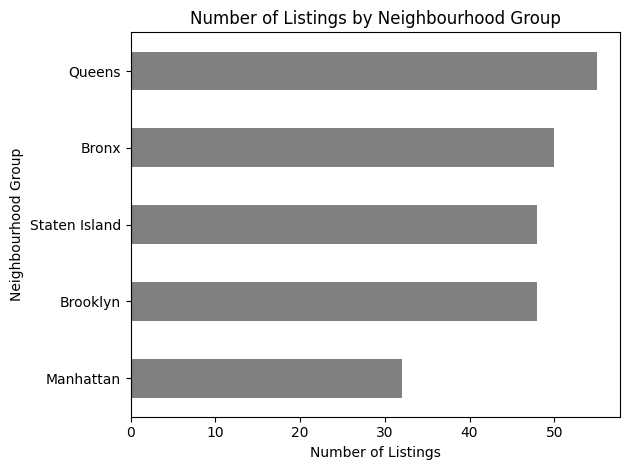

In [15]:
neighbourhood_counts = ny_gdf.groupby('neighbourhood_group').size().sort_values(ascending=True)

# Plot the sorted data
neighbourhood_counts.plot(kind='barh', color='grey')
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood Group')
plt.tight_layout()
plt.show()

In [16]:
chi_group = chi_data.groupby("neighbourhood")[['price']] #groupby object

chi_count = chi_group.count().rename(columns={'price': 'Total_Count'}).sort_values('Total_Count') #dataframe with total counts
chi_price = chi_group.median().rename(columns={'price': 'Median Price'}).sort_values('Median Price') #dataframe with median prices

#put them together
chi_together=chi_price.merge(chi_count,left_index=True, right_index=True)
chi_together=gdf.merge(chi_together, left_on='neighbourhood', right_index=True)
chi_together['density']=chi_together.Total_Count/chi_together.AREA
chi_together.head()

,neighbourhood,neighbourhood_group,geometry,AREA,Median Price,Total_Count,density
0,Lincoln Square,None,"MULTIPOLYGON (((-87.67440 41.97610, -87.67440 ...",1.195750e+07,91.0,103,0.000009
1,Hyde Park,None,"MULTIPOLYGON (((-87.58037 41.80252, -87.58039 ...",7.516245e+06,89.0,102,0.000014
2,Woodlawn,None,"MULTIPOLYGON (((-87.57714 41.78614, -87.57714 ...",9.629614e+06,88.0,147,0.000015
3,Rogers Park,None,"MULTIPOLYGON (((-87.65455 41.99817, -87.65573 ...",8.599655e+06,91.0,153,0.000018
4,Jefferson Park,None,"MULTIPOLYGON (((-87.75263 41.96797, -87.75279 ...",1.087239e+07,87.0,49,0.000005


In [18]:
ny_group = ny_data.groupby("neighbourhood")[['price']] #groupby object

ny_count = ny_group.count().rename(columns={'price': 'Total_Count'}).sort_values('Total_Count') #dataframe with total counts
ny_price = ny_group.median().rename(columns={'price': 'Median Price'}).sort_values('Median Price') #dataframe with median prices

#put them together
ny_together=ny_price.merge(ny_count,left_index=True, right_index=True)
ny_together=ny_gdf.merge(ny_together, left_on='neighbourhood', right_index=True)
ny_together['density']=ny_together.Total_Count/ny_together.AREA
ny_together.head()

,neighbourhood,neighbourhood_group,geometry,AREA,Median Price,Total_Count,density
0,Bayswater,Queens,"MULTIPOLYGON (((-73.76671 40.61491, -73.76825 ...",4.073818e+05,108.0,8,0.000020
22,Bayswater,Queens,"MULTIPOLYGON (((-73.76507 40.61357, -73.76502 ...",3.216613e+06,108.0,8,0.000002
1,Allerton,Bronx,"MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ...",4.231216e+06,94.0,42,0.000010
2,City Island,Bronx,"MULTIPOLYGON (((-73.78282 40.84392, -73.78257 ...",1.941968e+06,124.0,9,0.000005
44,City Island,Bronx,"MULTIPOLYGON (((-73.78457 40.85972, -73.78471 ...",4.770154e+04,124.0,9,0.000189


/usr/local/lib/python3.10/dist-packages/contextily/tile.py:623: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


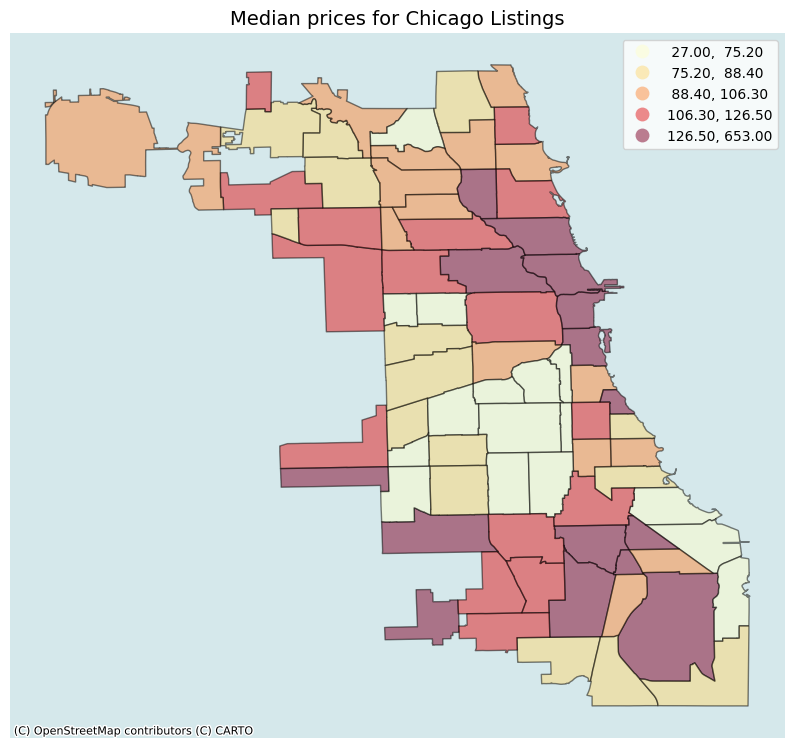

In [19]:
chi_ax2=chi_together.plot(figsize=(10,10), edgecolor='k', alpha=0.5, scheme='quantiles', column='Median Price', cmap='YlOrRd', legend=True)
ctx.add_basemap(chi_ax2,source=ctx.providers.CartoDB.Voyager);
chi_ax2.set_axis_off()
chi_ax2.set_title('Median prices for Chicago Listings', fontsize=14);

/usr/local/lib/python3.10/dist-packages/contextily/tile.py:623: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


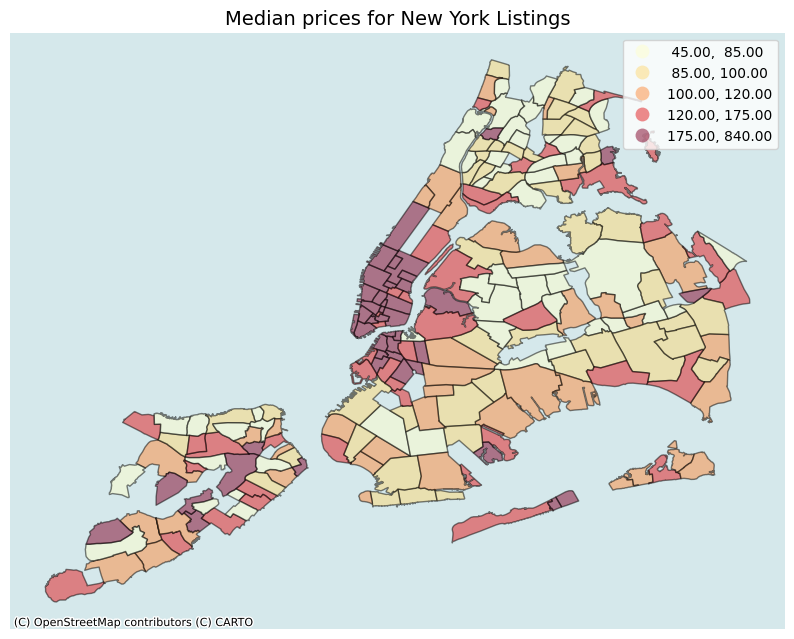

In [20]:
ny_ax2=ny_together.plot(figsize=(10,10), edgecolor='k', alpha=0.5, scheme='quantiles', column='Median Price', cmap='YlOrRd', legend=True)
ctx.add_basemap(ny_ax2,source=ctx.providers.CartoDB.Voyager);
ny_ax2.set_axis_off()
ny_ax2.set_title('Median prices for New York Listings', fontsize=14);

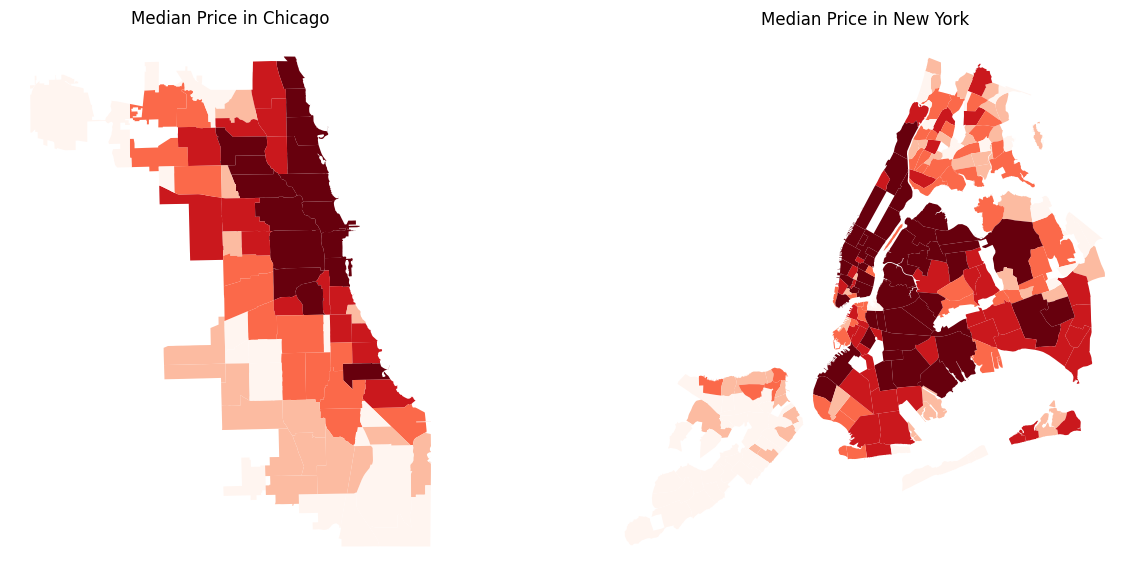

In [21]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
ax0 = chi_together.plot(column='Total_Count', cmap="Reds", scheme='quantiles', ax=axs[0]); ax0.set_axis_off(); ax0.set_title('Median Price in Chicago')
ax1 = ny_together.plot(column='Total_Count', cmap="Reds", scheme='quantiles', ax=axs[1]); ax1.set_axis_off(); ax1.set_title('Median Price in New York');

Now we know the busiest areas and the median price what type of room is in demand?


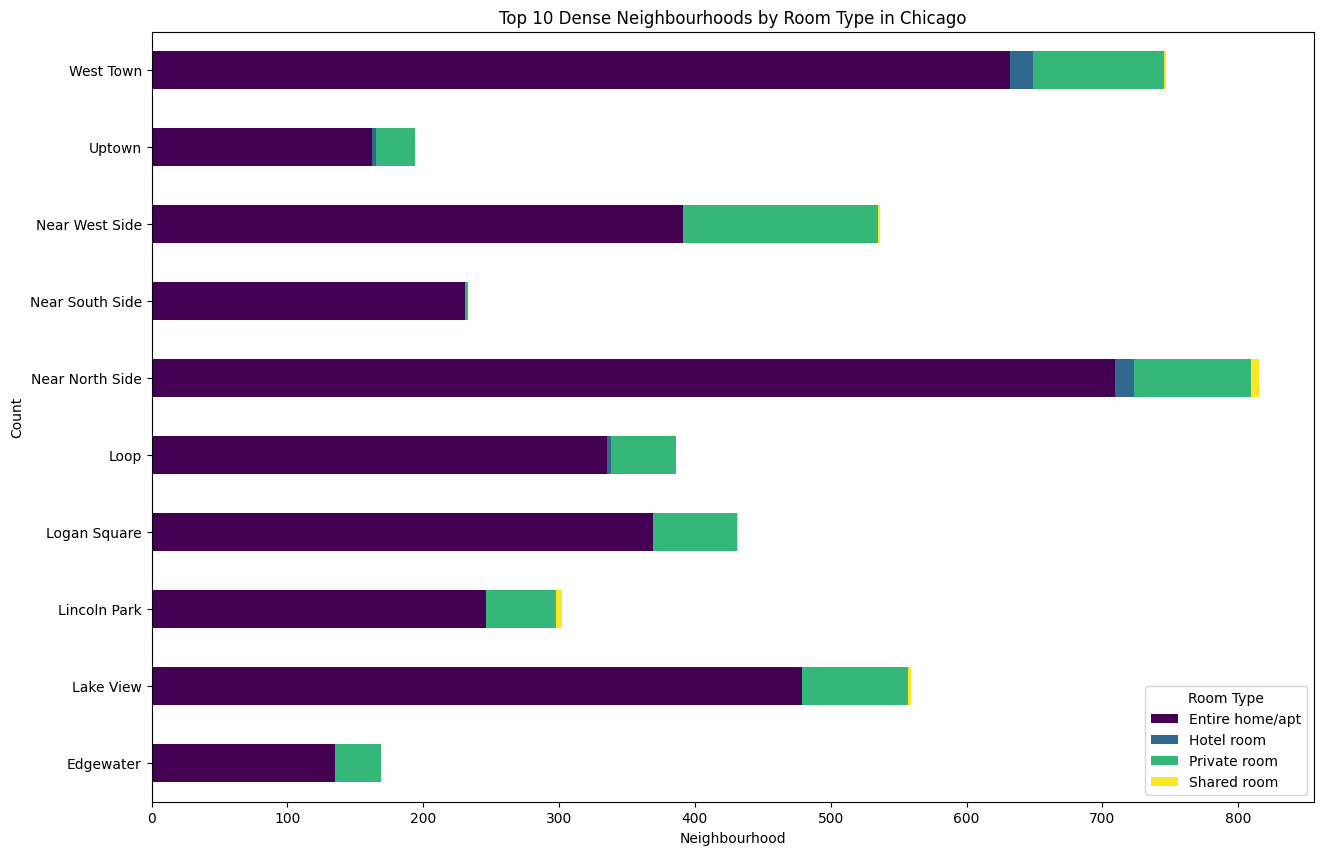

In [23]:
# Merge the dataframes on neighbourhood
chi_merged = pd.merge(chi_data, chi_together[['neighbourhood', 'density']], on='neighbourhood')

# Identify the top 10 dense neighbourhoods based on the 'density' column
chi_top_neighbourhoods = chi_merged.groupby('neighbourhood')['density'].sum().nlargest(10).index

# Filter data to only include these top 10 dense neighbourhoods
chi_top_density_data = chi_merged[chi_merged['neighbourhood'].isin(chi_top_neighbourhoods)]

# Group by neighbourhood and room type, then count
chi_room_type_counts = chi_top_density_data.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)

# Plotting Chicago room types for the top 10 dense neighbourhoods
chi_room_type_counts.plot(kind='barh', stacked=True, figsize=(15, 10), colormap='viridis')
plt.title('Top 10 Dense Neighbourhoods by Room Type in Chicago')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.legend(title='Room Type')
plt.xticks()
plt.show()

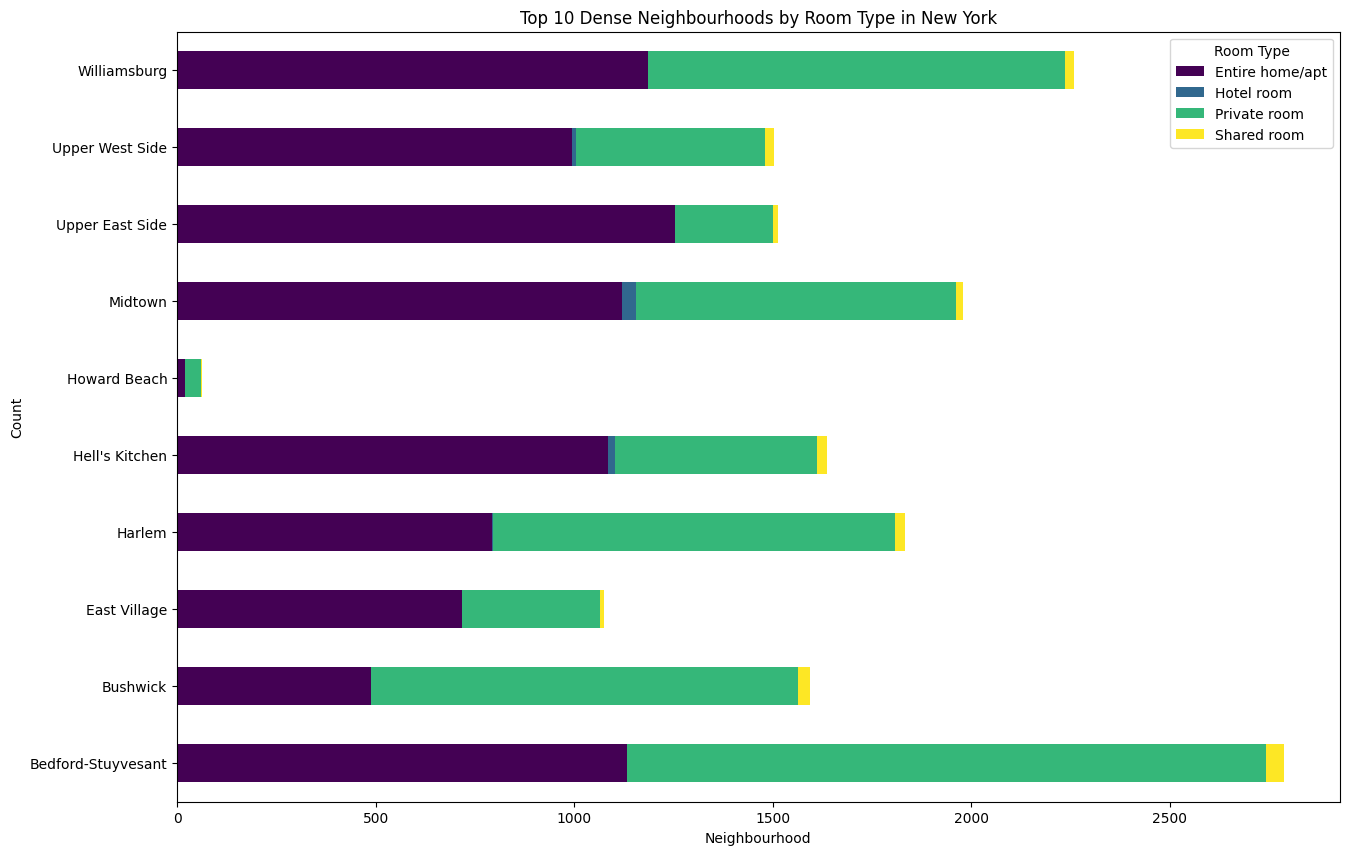

In [24]:
# Merge the dataframes on neighbourhood
ny_merged = pd.merge(ny_data, ny_together[['neighbourhood', 'density']], on='neighbourhood')

# Identify the top 10 dense neighbourhoods based on the 'density' column
ny_top_neighbourhoods = ny_merged.groupby('neighbourhood')['density'].sum().nlargest(10).index

# Filter data to only include these top 10 dense neighbourhoods
ny_top_density_data = ny_merged[ny_merged['neighbourhood'].isin(ny_top_neighbourhoods)]

# Group by neighbourhood and room type, then count
ny_room_type_counts = ny_top_density_data.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)

# Plotting New York room types for the top 10 dense neighbourhoods
ny_room_type_counts.plot(kind='barh', stacked=True, figsize=(15, 10), colormap='viridis')
plt.title('Top 10 Dense Neighbourhoods by Room Type in New York')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.legend(title='Room Type')
plt.xticks()
plt.show()

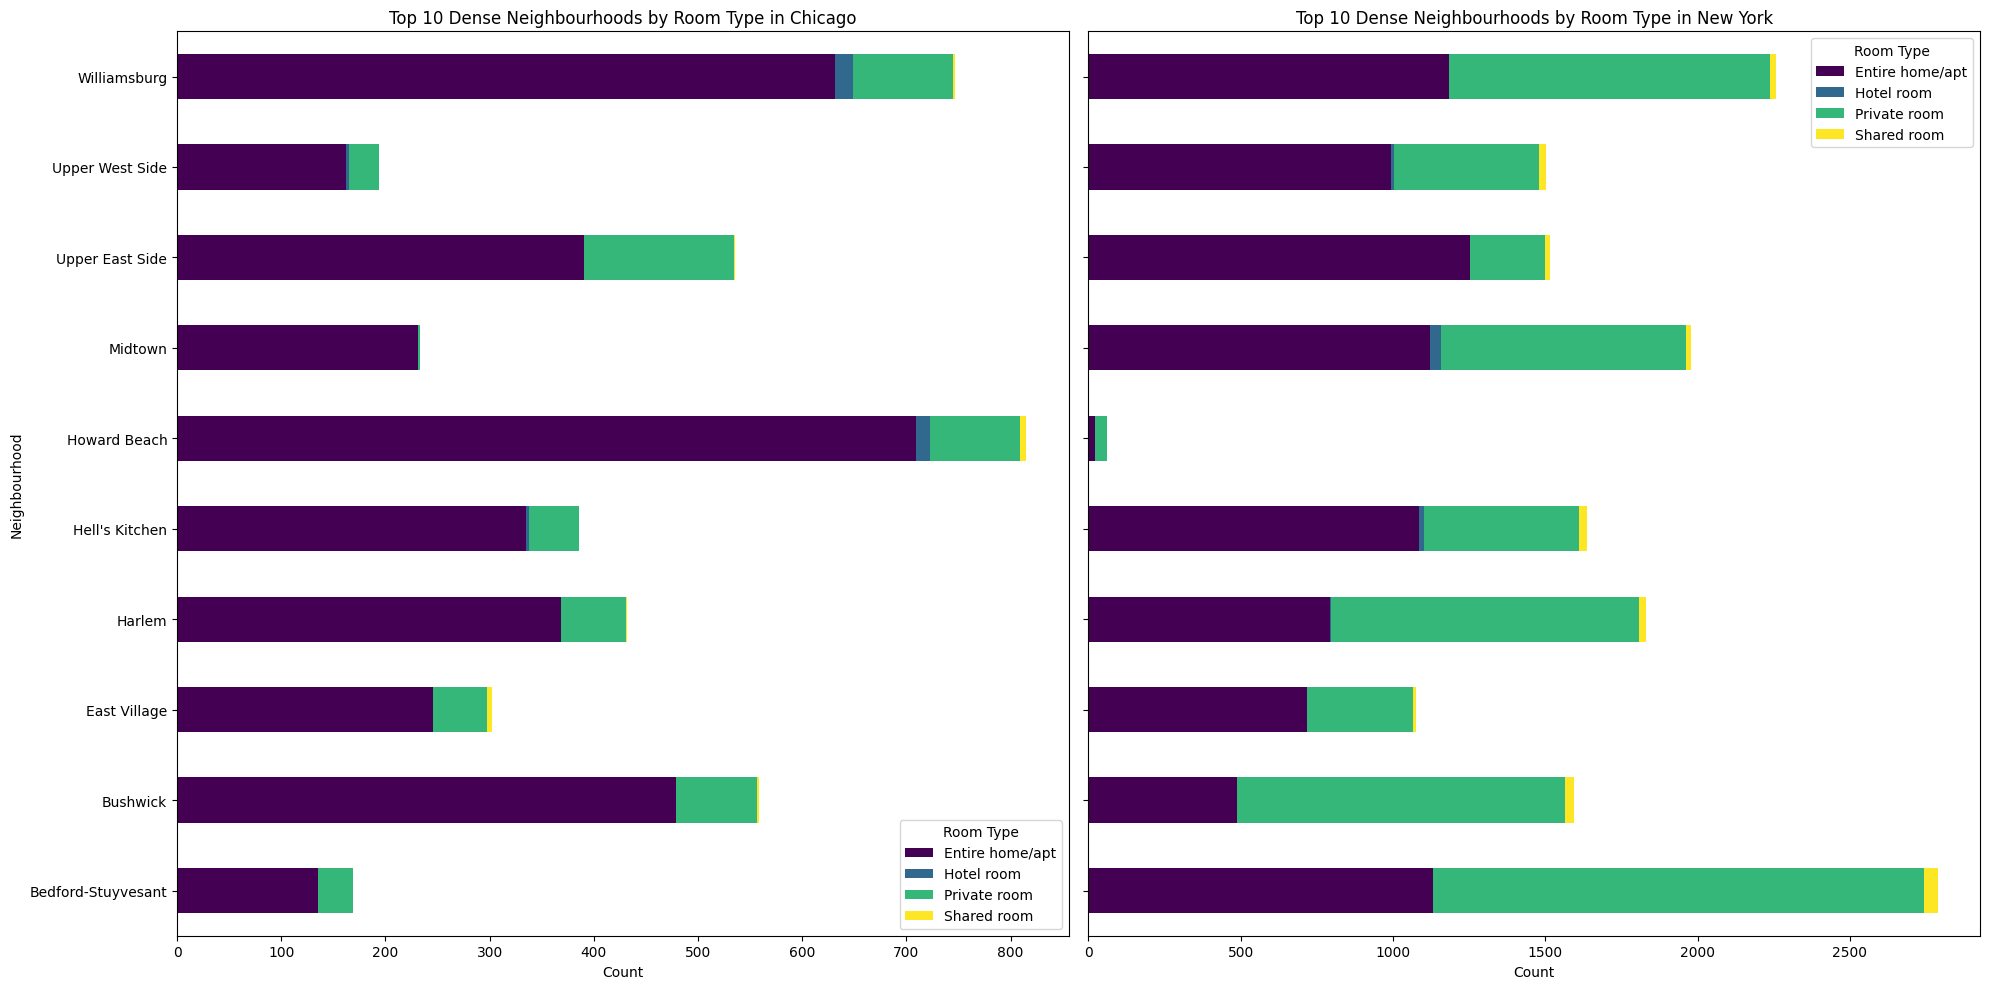

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Plotting Chicago room types for the top 10 dense neighbourhoods
chi_room_type_counts.plot(kind='barh', stacked=True, colormap='viridis', ax=axs[0]);
axs[0].set_title('Top 10 Dense Neighbourhoods by Room Type in Chicago')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Neighbourhood')
axs[0].legend(title='Room Type')

# Plotting New York room types for the top 10 dense neighbourhoods
ny_room_type_counts.plot(kind='barh', stacked=True, colormap='viridis', ax=axs[1])
axs[1].set_title('Top 10 Dense Neighbourhoods by Room Type in New York')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Neighbourhood')
axs[1].legend(title='Room Type')
plt.tight_layout()